In [161]:
from ArticlesRep import MeanSimilarityoneindustry,MeanSimilaritytwoindustry #common function

import pandas as pd

import numpy as np

%matplotlib inline

import pickle

import visdom

from tqdm import tnrange, tqdm_notebook
from tqdm.autonotebook import tqdm
tqdm.pandas()

from time import time,sleep
from datetime import datetime

from sklearn.metrics.pairwise import cosine_similarity
# import visdom
# vis=visdom.Visdom()
# env="TagBased"

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# %matplotlib inline

import re

from pprint import pprint
#coding:utf-8
import matplotlib.pyplot as plt
import seaborn as sns

#solved chinese display in matplotlib
from pylab import mpl
mpl.rcParams["font.family"] = 'DFKai-sb' 
mpl.rcParams['axes.unicode_minus'] = False


list_industry=["水泥","食品飲料","石化","紡織","電機機械","電器電纜","化學工業",
               "建材居家用品","造紙","鋼鐵金屬","車輛相關","科技相關","營建地產","運輸","觀光休閒娛樂",
               "金融相關","百貨通路","公用事業","控股","生技醫療保健","農林漁牧","航天軍工","能源","傳播出版","綜合",
               "傳產其他","其他","金屬礦採選",
              ]

In [292]:
def IQR(array):
    Q3,Q1=np.percentile(array,[75,25])
    return Q3-Q1

In [3]:
from keras.layers import Input
from keras.models import Model

Using TensorFlow backend.


## Data Set

In [5]:
picksample=np.load("D:3.AutoencoderForArticle/picksample.npy")
len(picksample)

12000

In [4]:
bow=np.load("D:3.AutoencoderForArticle/BOW_binary_v01.npy")

In [5]:
with open("D:3.AutoencoderForArticle/dict_collect_industry.p","rb") as f:
    dict_collect_industry=pickle.load(f)

## Reconstruct Model

In [6]:
from keras.models import load_model

In [7]:
#Autoencoder
autoencoder_untrained=load_model("autoencoder.initial.h5")
autoencoder_trained=load_model("best_weights.hdf5")

In [8]:
#Encoder_untrained
##layer
layer_encode=autoencoder_untrained.layers[1]
##dataflow
x=Input((20000,))
y=layer_encode(x)
##build Model
Encoder_untrained = Model(inputs=x,outputs=y)

In [9]:
#Encoder_rained
##layer
layer_encode=autoencoder_trained.layers[1]
##dataflow
x=Input((20000,))
y=layer_encode(x)
##build Model
Encoder_trained = Model(inputs=x,outputs=y)

## mean parewise Similarity in same industry

In [10]:
##除了同樣industry 也要比不同 industry 之間的

In [11]:
dict_=dict()
for k in dict_collect_industry:
    dict_[k]=len(dict_collect_industry[k])
df=pd.Series(dict_)
x=df.sort_values(ascending=False)
x

科技相關      6499
金融相關      1224
鋼鐵金屬      1030
車輛相關       392
生技醫療保健     341
營建地產       322
百貨通路       301
傳播出版       288
電機機械       214
能源         204
傳產其他       172
觀光休閒娛樂     166
紡織         145
運輸         117
化學工業        88
石化          86
公用事業        80
食品飲料        70
農林漁牧        66
造紙          55
水泥          49
建材居家用品      43
電器電纜        24
航天軍工        18
綜合           6
金屬礦採選        0
控股           0
其他           0
dtype: int64

In [ ]:
import 

### Similarity  In terms of Bow

In [12]:
dict_=dict()
for k in tqdm_notebook(dict_collect_industry):
    array=bow[dict_collect_industry[k]]
    if array.shape[0]!=0:
        dict_[k]=MeanSimilarityoneindustry(array)
y=pd.Series(dict_).sort_values(ascending=False)

In [13]:
pd.DataFrame(data=[y,x]).T.rename(columns={0:"similarity",1:"counts"})

,similarity,counts
傳播出版,0.678109,288.0
綜合,0.164056,6.0
建材居家用品,0.147406,43.0
水泥,0.140254,49.0
造紙,0.127686,55.0
能源,0.124400,204.0
紡織,0.119469,145.0
石化,0.119360,86.0
化學工業,0.109534,88.0
食品飲料,0.107475,70.0


### Similarity  In terms of untrained AE

In [26]:
dict_=dict()
for k in tqdm_notebook(dict_collect_industry):
    array=bow[dict_collect_industry[k]]
    if array.shape[0]!=0:
        array=Encoder_untrained.predict(array)
        dict_[k]=MeanSimilarityoneindustry(array)
y=pd.Series(dict_).sort_values(ascending=False)

In [28]:
pd.DataFrame(data=[y,x]).T.rename(columns={0:"similarity",1:"counts"})

,similarity,counts
傳播出版,0.776637,288.0
綜合,0.416461,6.0
建材居家用品,0.405265,43.0
水泥,0.398358,49.0
能源,0.389825,204.0
紡織,0.388938,145.0
石化,0.387904,86.0
造紙,0.385356,55.0
化學工業,0.380955,88.0
農林漁牧,0.379108,66.0


### Similarity  In terms of  AE

In [29]:
dict_=dict()
for k in tqdm_notebook(dict_collect_industry):
    array=bow[dict_collect_industry[k]]
    if array.shape[0]!=0:
        array=Encoder_trained.predict(array)
        dict_[k]=MeanSimilarityoneindustry(array)
y=pd.Series(dict_).sort_values(ascending=False)

In [30]:
pd.DataFrame(data=[y,x]).T.rename(columns={0:"similarity",1:"counts"})

,similarity,counts
傳播出版,0.969495,288.0
綜合,0.944694,6.0
能源,0.934721,204.0
建材居家用品,0.932537,43.0
水泥,0.920405,49.0
紡織,0.919983,145.0
公用事業,0.916855,80.0
石化,0.916222,86.0
農林漁牧,0.914296,66.0
觀光休閒娛樂,0.914113,166.0


In [24]:
Encoder_untrained.predict(np.arange(20000*2).reshape((2,20000))).shape

(2, 500)

## mean parewise Similarity in different industry

### Similarity  In terms of  Bow

In [58]:
array1=bow[dict_collect_industry["食品飲料"]]
array2=bow[dict_collect_industry["造紙"]]
MeanSimilaritytwoindustry(array1,array2)

0.09671060517993393

In [59]:
li=[]
for k in tqdm_notebook(dict_collect_industry):
    array1=bow[dict_collect_industry[k]]
    if len(array1)!=0:
#         array1=Encoder_trained.predict(array1)
        for j in dict_collect_industry:
                array2=bow[dict_collect_industry[j]]
                if len(array2)!=0:
#                     array2=Encoder_trained.predict(array2)
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

百貨通路 百貨通路 0.08168207798577211
百貨通路 食品飲料 0.07361999178290989
百貨通路 生技醫療保健 0.06552719205466366
百貨通路 電機機械 0.0707188764199001
百貨通路 能源 0.07008906339128972
百貨通路 石化 0.06707286564641976
百貨通路 電器電纜 0.06657066816929681
百貨通路 觀光休閒娛樂 0.06915496140037407
百貨通路 科技相關 0.06493391897266221
百貨通路 營建地產 0.06581206164863997
百貨通路 水泥 0.07355201859190401
百貨通路 車輛相關 0.06575856358099548
百貨通路 運輸 0.0650521581544052
百貨通路 造紙 0.07275930287262568
百貨通路 航天軍工 0.06676315607510257
百貨通路 農林漁牧 0.07349177510729758
百貨通路 公用事業 0.06731268407613301
百貨通路 金融相關 0.0661646007342014
百貨通路 鋼鐵金屬 0.07131798329292756
百貨通路 傳產其他 0.07262246330244052
百貨通路 化學工業 0.07107842792338159
百貨通路 傳播出版 0.022973599013102752
百貨通路 綜合 0.07838986651699086
百貨通路 建材居家用品 0.07726085370270613
百貨通路 紡織 0.07097104598607684
食品飲料 百貨通路 0.07361999178290989
食品飲料 食品飲料 0.12022503982091236
食品飲料 生技醫療保健 0.08507824229844187
食品飲料 電機機械 0.08941792238282198
食品飲料 能源 0.07367406867603542
食品飲料 石化 0.08736170950325446
食品飲料 電器電纜 0.08809628372058854
食品飲料 觀光休閒娛樂 0.08596811996276088
食品飲料 科技相關 0.08486101

綜合 科技相關 0.06938863034028114
綜合 營建地產 0.07626451594466725
綜合 水泥 0.080228468541794
綜合 車輛相關 0.06678311178478466
綜合 運輸 0.07134684862106086
綜合 造紙 0.08457978969651292
綜合 航天軍工 0.06986832275886085
綜合 農林漁牧 0.07615004066644729
綜合 公用事業 0.07047864243682862
綜合 金融相關 0.07171263589577732
綜合 鋼鐵金屬 0.07674854014318593
綜合 傳產其他 0.08493912752978368
綜合 化學工業 0.07427991568718115
綜合 傳播出版 0.026482442523716426
綜合 綜合 0.30337960665534097
綜合 建材居家用品 0.08509573130978873
綜合 紡織 0.07639366497022615
建材居家用品 百貨通路 0.07726085370270613
建材居家用品 食品飲料 0.10853703791766925
建材居家用品 生技醫療保健 0.09402501370987261
建材居家用品 電機機械 0.1108014651692861
建材居家用品 能源 0.06767034871929738
建材居家用品 石化 0.09711228356126597
建材居家用品 電器電纜 0.10160532042059729
建材居家用品 觀光休閒娛樂 0.10106891903383375
建材居家用品 科技相關 0.10180690827012093
建材居家用品 營建地產 0.09563416495912305
建材居家用品 水泥 0.11859624792004617
建材居家用品 車輛相關 0.09198251623530192
建材居家用品 運輸 0.09369267059762988
建材居家用品 造紙 0.11272385675650537
建材居家用品 航天軍工 0.08318549433844699
建材居家用品 農林漁牧 0.06999663923072695
建材居家用品 公用事業 0.06754651124557

In [60]:
df=pd.DataFrame(li)
df=df.pivot(index=0,columns=1,values=2)

In [61]:
df

1,傳播出版,傳產其他,公用事業,化學工業,建材居家用品,水泥,營建地產,生技醫療保健,百貨通路,石化,...,觀光休閒娛樂,車輛相關,農林漁牧,造紙,運輸,金融相關,鋼鐵金屬,電器電纜,電機機械,食品飲料
0,,,,,,,,,,,,,,,,,,,,,
傳播出版,0.679227,0.021397,0.020225,0.020294,0.012639,0.016606,0.016476,0.019177,0.022974,0.034063,...,0.015048,0.016016,0.029422,0.026715,0.020923,0.024126,0.027530,0.013143,0.022725,0.016921
傳產其他,0.021397,0.091011,0.067001,0.083191,0.096556,0.085774,0.074029,0.075114,0.072622,0.075933,...,0.077714,0.073064,0.072140,0.085518,0.074428,0.066165,0.072635,0.077087,0.083380,0.083816
公用事業,0.020225,0.067001,0.091245,0.066011,0.067547,0.067952,0.061544,0.059890,0.067313,0.066932,...,0.059772,0.059879,0.077661,0.069633,0.059539,0.061994,0.071868,0.057013,0.064167,0.069868
化學工業,0.020294,0.083191,0.066011,0.119653,0.115056,0.103477,0.080038,0.081412,0.071078,0.095427,...,0.083713,0.081015,0.070519,0.102830,0.082966,0.064748,0.082036,0.086884,0.095416,0.097460
建材居家用品,0.012639,0.096556,0.067547,0.115056,0.167233,0.118596,0.095634,0.094025,0.077261,0.097112,...,0.101069,0.091983,0.069997,0.112724,0.093693,0.069834,0.084711,0.101605,0.110801,0.108537
水泥,0.016606,0.085774,0.067952,0.103477,0.118596,0.157800,0.093377,0.084168,0.073552,0.096043,...,0.087966,0.083656,0.070276,0.105507,0.088119,0.069485,0.085898,0.088843,0.093539,0.098819
營建地產,0.016476,0.074029,0.061544,0.080038,0.095634,0.093377,0.102937,0.071531,0.065812,0.073318,...,0.075086,0.067753,0.064382,0.082121,0.072942,0.064897,0.070343,0.072688,0.076119,0.079077
生技醫療保健,0.019177,0.075114,0.059890,0.081412,0.094025,0.084168,0.071531,0.103231,0.065527,0.072937,...,0.078013,0.070785,0.059618,0.079968,0.075115,0.063898,0.066219,0.076861,0.079559,0.085078
百貨通路,0.022974,0.072622,0.067313,0.071078,0.077261,0.073552,0.065812,0.065527,0.081682,0.067073,...,0.069155,0.065759,0.073492,0.072759,0.065052,0.066165,0.071318,0.066571,0.070719,0.073620


### Similarity  In terms of untrained AE

In [62]:
array1=Encoder_untrained.predict(bow[dict_collect_industry["食品飲料"]])
array2=Encoder_untrained.predict(bow[dict_collect_industry["造紙"]])
MeanSimilaritytwoindustry(array1,array2)

0.37503737

In [63]:
li=[]
for k in tqdm_notebook(dict_collect_industry):
    array1=bow[dict_collect_industry[k]]
    if len(array1)!=0:
        array1=Encoder_untrained.predict(array1)
        for j in dict_collect_industry:
                array2=bow[dict_collect_industry[j]]
                if len(array2)!=0:
                    array2=Encoder_untrained.predict(array2)
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

百貨通路 百貨通路 0.36709908
百貨通路 食品飲料 0.36200002
百貨通路 生技醫療保健 0.35520548
百貨通路 電機機械 0.36001703
百貨通路 能源 0.36006722
百貨通路 石化 0.35717502
百貨通路 電器電纜 0.35817397
百貨通路 觀光休閒娛樂 0.3574258
百貨通路 科技相關 0.35795918
百貨通路 營建地產 0.35532176
百貨通路 水泥 0.3612008
百貨通路 車輛相關 0.35755906
百貨通路 運輸 0.35689825
百貨通路 造紙 0.35802495
百貨通路 航天軍工 0.35323352
百貨通路 農林漁牧 0.36549887
百貨通路 公用事業 0.3596318
百貨通路 金融相關 0.3573209
百貨通路 鋼鐵金屬 0.36003077
百貨通路 傳產其他 0.36176664
百貨通路 化學工業 0.35938552
百貨通路 傳播出版 0.33297694
百貨通路 綜合 0.3621036
百貨通路 建材居家用品 0.36289072
百貨通路 紡織 0.35955945
食品飲料 百貨通路 0.36200002
食品飲料 食品飲料 0.38788962
食品飲料 生技醫療保健 0.36618403
食品飲料 電機機械 0.37039098
食品飲料 能源 0.36086413
食品飲料 石化 0.37074122
食品飲料 電器電纜 0.3676489
食品飲料 觀光休閒娛樂 0.36412373
食品飲料 科技相關 0.36968184
食品飲料 營建地產 0.36323485
食品飲料 水泥 0.37560445
食品飲料 車輛相關 0.36510825
食品飲料 運輸 0.36840004
食品飲料 造紙 0.37503737
食品飲料 航天軍工 0.35622177
食品飲料 農林漁牧 0.36500275
食品飲料 公用事業 0.36070725
食品飲料 金融相關 0.35826638
食品飲料 鋼鐵金屬 0.36500117
食品飲料 傳產其他 0.3691171
食品飲料 化學工業 0.37410408
食品飲料 傳播出版 0.3237731
食品飲料 綜合 0.36616498
食品飲料 建材居家用品 0.38

In [69]:
df_untrainAE=pd.DataFrame(li)
df_untrainAE=df_untrainAE.pivot(index=0,columns=1,values=2)

In [70]:
df_untrainAE

1,傳播出版,傳產其他,公用事業,化學工業,建材居家用品,水泥,營建地產,生技醫療保健,百貨通路,石化,...,觀光休閒娛樂,車輛相關,農林漁牧,造紙,運輸,金融相關,鋼鐵金屬,電器電纜,電機機械,食品飲料
0,,,,,,,,,,,,,,,,,,,,,
傳播出版,0.777412,0.332320,0.338405,0.326843,0.323095,0.322318,0.320636,0.323983,0.332977,0.322584,...,0.322816,0.326622,0.347439,0.310675,0.326657,0.329622,0.331867,0.328440,0.328612,0.323773
傳產其他,0.332320,0.375608,0.358393,0.368808,0.377082,0.369467,0.361349,0.362674,0.361767,0.364458,...,0.363971,0.363529,0.363260,0.367963,0.364676,0.357987,0.360348,0.364949,0.368181,0.369117
公用事業,0.338405,0.358393,0.373264,0.356438,0.357802,0.359423,0.354262,0.352251,0.359632,0.358653,...,0.353220,0.354330,0.368094,0.357065,0.354660,0.356160,0.360524,0.351580,0.356432,0.360707
化學工業,0.326843,0.368808,0.356438,0.387989,0.386149,0.378159,0.364321,0.365322,0.359386,0.372884,...,0.363765,0.368082,0.362393,0.375336,0.369256,0.355989,0.365787,0.367851,0.373827,0.374104
建材居家用品,0.323095,0.377082,0.357802,0.386149,0.419096,0.388831,0.372101,0.371703,0.362891,0.376699,...,0.372222,0.374801,0.362395,0.383803,0.376958,0.358422,0.367488,0.377563,0.383513,0.381487
水泥,0.322318,0.369467,0.359423,0.378159,0.388831,0.410637,0.372123,0.366276,0.361201,0.372656,...,0.367052,0.369571,0.364968,0.375935,0.372006,0.359393,0.367849,0.369132,0.371757,0.375604
營建地產,0.320636,0.361349,0.354262,0.364321,0.372101,0.372123,0.374373,0.357021,0.355322,0.360045,...,0.358842,0.358169,0.356556,0.364094,0.360709,0.353333,0.357076,0.359024,0.360589,0.363235
生技醫療保健,0.323983,0.362674,0.352251,0.365323,0.371703,0.366276,0.357021,0.377109,0.355206,0.360186,...,0.358560,0.359776,0.355483,0.363495,0.362513,0.355441,0.355735,0.361007,0.362709,0.366184
百貨通路,0.332977,0.361767,0.359632,0.359386,0.362891,0.361201,0.355322,0.355205,0.367099,0.357175,...,0.357426,0.357559,0.365499,0.358025,0.356898,0.357321,0.360031,0.358174,0.360017,0.362000


### Similarity  In terms of  AE

In [71]:
array1=Encoder_trained.predict(bow[dict_collect_industry["食品飲料"]])
array2=Encoder_trained.predict(bow[dict_collect_industry["造紙"]])
MeanSimilaritytwoindustry(array1,array2)

0.87964094

In [72]:
li=[]
for k in tqdm_notebook(dict_collect_industry):
    array1=bow[dict_collect_industry[k]]
    if len(array1)!=0:
        array1=Encoder_trained.predict(array1)
        for j in dict_collect_industry:
                array2=bow[dict_collect_industry[j]]
                if len(array2)!=0:
                    array2=Encoder_trained.predict(array2)
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

百貨通路 百貨通路 0.89698464
百貨通路 食品飲料 0.8734781
百貨通路 生技醫療保健 0.859852
百貨通路 電機機械 0.86773133
百貨通路 能源 0.9023963
百貨通路 石化 0.8851992
百貨通路 電器電纜 0.8750697
百貨通路 觀光休閒娛樂 0.87992376
百貨通路 科技相關 0.8555482
百貨通路 營建地產 0.87594736
百貨通路 水泥 0.87192553
百貨通路 車輛相關 0.8851425
百貨通路 運輸 0.8835829
百貨通路 造紙 0.8542819
百貨通路 航天軍工 0.87177265
百貨通路 農林漁牧 0.8979537
百貨通路 公用事業 0.90476555
百貨通路 金融相關 0.8955062
百貨通路 鋼鐵金屬 0.89149153
百貨通路 傳產其他 0.8773484
百貨通路 化學工業 0.87248677
百貨通路 傳播出版 0.87299085
百貨通路 綜合 0.9115508
百貨通路 建材居家用品 0.8452355
百貨通路 紡織 0.86178166
食品飲料 百貨通路 0.8734781
食品飲料 食品飲料 0.8954715
食品飲料 生技醫療保健 0.88416415
食品飲料 電機機械 0.88810223
食品飲料 能源 0.8645381
食品飲料 石化 0.89709
食品飲料 電器電纜 0.8986969
食品飲料 觀光休閒娛樂 0.90044945
食品飲料 科技相關 0.88165164
食品飲料 營建地產 0.8861082
食品飲料 水泥 0.9015812
食品飲料 車輛相關 0.8932834
食品飲料 運輸 0.8982115
食品飲料 造紙 0.87964094
食品飲料 航天軍工 0.86806166
食品飲料 農林漁牧 0.86106586
食品飲料 公用事業 0.87627894
食品飲料 金融相關 0.87084764
食品飲料 鋼鐵金屬 0.873117
食品飲料 傳產其他 0.88501096
食品飲料 化學工業 0.89748114
食品飲料 傳播出版 0.84036785
食品飲料 綜合 0.89549035
食品飲料 建材居家用品 0.89762545
食品飲料 紡織 0.900

In [75]:
df_trainAE=pd.DataFrame(li)
df_trainAE=df_trainAE.pivot(index=0,columns=1,values=2)

In [76]:
df_trainAE

1,傳播出版,傳產其他,公用事業,化學工業,建材居家用品,水泥,營建地產,生技醫療保健,百貨通路,石化,...,觀光休閒娛樂,車輛相關,農林漁牧,造紙,運輸,金融相關,鋼鐵金屬,電器電纜,電機機械,食品飲料
0,,,,,,,,,,,,,,,,,,,,,
傳播出版,0.969600,0.848700,0.894808,0.851221,0.796110,0.824538,0.833085,0.825963,0.872991,0.868723,...,0.855276,0.878318,0.879920,0.820905,0.855735,0.869278,0.867145,0.867777,0.850516,0.840368
傳產其他,0.848700,0.881584,0.881094,0.887573,0.881435,0.889970,0.882020,0.873754,0.877348,0.889839,...,0.893134,0.888228,0.867803,0.869348,0.891382,0.874789,0.873951,0.889882,0.879792,0.885011
公用事業,0.894808,0.881094,0.917894,0.877873,0.842243,0.872042,0.876334,0.856848,0.904766,0.894375,...,0.880385,0.892110,0.912113,0.858680,0.885814,0.902077,0.902851,0.878552,0.872616,0.876279
化學工業,0.851221,0.887573,0.877873,0.907443,0.907128,0.907331,0.888973,0.877469,0.872487,0.907133,...,0.900961,0.898024,0.864664,0.890211,0.900805,0.868040,0.878566,0.902516,0.896054,0.897481
建材居家用品,0.796110,0.881435,0.842243,0.907128,0.934106,0.917243,0.891242,0.884603,0.845236,0.894975,...,0.903789,0.884911,0.823476,0.891652,0.898570,0.841554,0.850571,0.900948,0.892636,0.897625
水泥,0.824538,0.889970,0.872042,0.907331,0.917243,0.922030,0.903400,0.887368,0.871926,0.905394,...,0.906729,0.893339,0.856308,0.893616,0.907712,0.871791,0.876890,0.901489,0.893343,0.901581
營建地產,0.833085,0.882021,0.876335,0.888973,0.891242,0.903400,0.899939,0.876534,0.875947,0.889941,...,0.895852,0.881934,0.861961,0.874387,0.898000,0.879141,0.874944,0.886649,0.876657,0.886108
生技醫療保健,0.825963,0.873754,0.856848,0.877469,0.884603,0.887368,0.876534,0.896375,0.859852,0.872263,...,0.898545,0.880244,0.832998,0.855801,0.889854,0.860977,0.847014,0.891866,0.871994,0.884164
百貨通路,0.872991,0.877348,0.904766,0.872487,0.845236,0.871926,0.875947,0.859852,0.896985,0.885199,...,0.879924,0.885143,0.897954,0.854282,0.883583,0.895506,0.891492,0.875070,0.867731,0.873478


In [ ]:
# Metrics mean sum similarity one to multi

In [130]:
#bow
li=[]
for i,S in df[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)

,industry,R,UR,(R-UR)/2
0,傳播出版,0.679227,0.021070,0.329078
12,綜合,0.303380,0.072577,0.115401
4,建材居家用品,0.167233,0.090794,0.038220
5,水泥,0.157800,0.084454,0.036673
13,能源,0.128692,0.066197,0.031247
18,造紙,0.143547,0.084130,0.029708
22,電器電纜,0.130438,0.072582,0.028928
14,航天軍工,0.125201,0.068092,0.028555
9,石化,0.129600,0.077346,0.026127
11,紡織,0.125542,0.083416,0.021063


In [132]:
#UAE
li=[]
for i,S in df_untrainAE[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)

,industry,R,UR,(R-UR)/2
0,傳播出版,0.777412,0.327992,0.224710
12,綜合,0.513718,0.361728,0.075995
4,建材居家用品,0.419096,0.371700,0.023698
5,水泥,0.410637,0.367451,0.021593
13,能源,0.392816,0.356130,0.018343
14,航天軍工,0.388210,0.353675,0.017268
9,石化,0.395021,0.362884,0.016069
22,電器電纜,0.392299,0.360175,0.016062
18,造紙,0.396531,0.364573,0.015979
17,農林漁牧,0.388515,0.361017,0.013749


In [133]:
#AE
li=[]
for i,S in df_trainAE[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)

,industry,R,UR,(R-UR)/2
0,傳播出版,0.969600,0.852941,0.058330
13,能源,0.935041,0.874088,0.030477
4,建材居家用品,0.934106,0.875658,0.029224
12,綜合,0.953911,0.896704,0.028604
17,農林漁牧,0.915595,0.870874,0.022360
11,紡織,0.920534,0.885247,0.017644
2,公用事業,0.917894,0.883162,0.017366
5,水泥,0.922030,0.887901,0.017064
7,生技醫療保健,0.896375,0.869223,0.013576
15,觀光休閒娛樂,0.914631,0.889304,0.012664


ImportError: No module named 'spherecluster'

### Similarity  In terms of  AE with supervision (Model one layer ,20000 common word)

In [5]:
Data=np.load("D:3.AutoencoderForArticle/BOW_binary_v01.npy")

In [6]:
with open("D:3.AutoencoderForArticle/train_dict_collect_small_industry","rb") as f:
    train_dict_collect_small_industry=pickle.load(f)

In [7]:
with open("D:3.AutoencoderForArticle/test_dict_collect_small_industry","rb") as f:
    test_dict_collect_small_industry=pickle.load(f)

In [8]:
from keras.models import load_model

Using TensorFlow backend.


In [9]:
# custommed function
def tripletlossfunction(inputs):
    r01=inputs[0]
    r02=inputs[1]
    loss=K.log(1+K.exp(r02-r01))
#     x=np.array([[0],[1],[0],[1]])
#     x=K.variable(x)
    return loss

def losspassfunction(y_true,y_pred):
    return y_pred


In [11]:
Tri_AutoEncoder=load_model("Tri_AutoEncoder_trained.h5",custom_objects={"losspassfunction":losspassfunction})

In [12]:
encoder_in_AE=Tri_AutoEncoder.layers[3]

### on Trainset

In [14]:
li=[]
model=encoder_in_AE
dict_collect_industry=train_dict_collect_small_industry

for k in tqdm_notebook(dict_collect_industry):
    array1=bow[dict_collect_industry[k]]
    if len(array1)!=0:
        array1=model.predict(array1)
        for j in dict_collect_industry:
                array2=bow[dict_collect_industry[j]]
                if len(array2)!=0:
                    array2=model.predict(array2)
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

生技醫療保健 生技醫療保健 0.9503694
生技醫療保健 百貨通路 0.64897704
生技醫療保健 傳播出版 0.59648645
生技醫療保健 營建地產 0.60032886
生技醫療保健 車輛相關 0.6357869
百貨通路 生技醫療保健 0.648977
百貨通路 百貨通路 0.951421
百貨通路 傳播出版 0.62093025
百貨通路 營建地產 0.64138734
百貨通路 車輛相關 0.65031534
傳播出版 生技醫療保健 0.5964864
傳播出版 百貨通路 0.62093025
傳播出版 傳播出版 0.9747632
傳播出版 營建地產 0.6003573
傳播出版 車輛相關 0.61065286
營建地產 生技醫療保健 0.6003288
營建地產 百貨通路 0.64138734
營建地產 傳播出版 0.6003573
營建地產 營建地產 0.9443346
營建地產 車輛相關 0.61651313
車輛相關 生技醫療保健 0.6357869
車輛相關 百貨通路 0.6503153
車輛相關 傳播出版 0.6106529
車輛相關 營建地產 0.61651313
車輛相關 車輛相關 0.96131873



In [16]:
df_trainAE=pd.DataFrame(li)
df_trainAE=df_trainAE.pivot(index=0,columns=1,values=2)

In [17]:
df_trainAE

1,傳播出版,營建地產,生技醫療保健,百貨通路,車輛相關
0,,,,,
傳播出版,0.974763,0.600357,0.596486,0.620930,0.610653
營建地產,0.600357,0.944335,0.600329,0.641387,0.616513
生技醫療保健,0.596486,0.600329,0.950369,0.648977,0.635787
百貨通路,0.620930,0.641387,0.648977,0.951421,0.650315
車輛相關,0.610653,0.616513,0.635787,0.650315,0.961319


In [18]:
#AE
li=[]
for i,S in df_trainAE[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)

,industry,R,UR,(R-UR)/2
0,傳播出版,0.974763,0.607107,0.183828
4,車輛相關,0.961319,0.628317,0.166501
2,生技醫療保健,0.950369,0.620395,0.164987
1,營建地產,0.944335,0.614647,0.164844
3,百貨通路,0.951421,0.640402,0.155509


#### on testset

In [21]:
li=[]
model=encoder_in_AE
dict_collect_industry=test_dict_collect_small_industry

for k in tqdm_notebook(dict_collect_industry):
    array1=bow[dict_collect_industry[k]]
    if len(array1)!=0:
        array1=model.predict(array1)
        for j in dict_collect_industry:
                array2=bow[dict_collect_industry[j]]
                if len(array2)!=0:
                    array2=model.predict(array2)
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

生技醫療保健 生技醫療保健 0.932781
生技醫療保健 百貨通路 0.7199085
生技醫療保健 傳播出版 0.62326825
生技醫療保健 營建地產 0.64538056
生技醫療保健 車輛相關 0.7225844
百貨通路 生技醫療保健 0.7199085
百貨通路 百貨通路 0.9336065
百貨通路 傳播出版 0.6854175
百貨通路 營建地產 0.72235763
百貨通路 車輛相關 0.7555785
傳播出版 生技醫療保健 0.6232683
傳播出版 百貨通路 0.6854175
傳播出版 傳播出版 0.96257
傳播出版 營建地產 0.62382054
傳播出版 車輛相關 0.6517313
營建地產 生技醫療保健 0.64538056
營建地產 百貨通路 0.72235763
營建地產 傳播出版 0.6238205
營建地產 營建地產 0.92721236
營建地產 車輛相關 0.6822071
車輛相關 生技醫療保健 0.7225844
車輛相關 百貨通路 0.7555786
車輛相關 傳播出版 0.65173125
車輛相關 營建地產 0.68220717
車輛相關 車輛相關 0.9331247



In [22]:
df_trainAE=pd.DataFrame(li)
df_trainAE=df_trainAE.pivot(index=0,columns=1,values=2)

In [23]:
df_trainAE

1,傳播出版,營建地產,生技醫療保健,百貨通路,車輛相關
0,,,,,
傳播出版,0.962570,0.623821,0.623268,0.685417,0.651731
營建地產,0.623820,0.927212,0.645381,0.722358,0.682207
生技醫療保健,0.623268,0.645381,0.932781,0.719908,0.722584
百貨通路,0.685417,0.722358,0.719908,0.933607,0.755579
車輛相關,0.651731,0.682207,0.722584,0.755579,0.933125


In [25]:
#AE
li=[]
for i,S in df_trainAE[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)

,industry,R,UR,(R-UR)/2
0,傳播出版,0.962570,0.646059,0.158255
1,營建地產,0.927212,0.668441,0.129385
2,生技醫療保健,0.932781,0.677785,0.127498
4,車輛相關,0.933125,0.703025,0.115050
3,百貨通路,0.933607,0.720816,0.106395


### Similarity  In terms of  AE with supervision (Model 2 layer ,common 19404 words)

In [29]:
Data=np.load("D:3.AutoencoderForArticle/BOW_binary_v02.npy")

In [80]:
with open("D:3.AutoencoderForArticle/train_dict_collect_small_industry","rb") as f:
    train_dict_collect_small_industry=pickle.load(f)

In [81]:
with open("D:3.AutoencoderForArticle/test_dict_collect_small_industry","rb") as f:
    test_dict_collect_small_industry=pickle.load(f)

#### load model

In [82]:
from keras.models import load_model

In [83]:
# custommed function
def tripletlossfunction(inputs):
    r01=inputs[0]
    r02=inputs[1]
    loss=K.log(1+K.exp(r02-r01))
#     x=np.array([[0],[1],[0],[1]])
#     x=K.variable(x)
    return loss

def losspassfunction(y_true,y_pred):
    return y_pred


In [84]:
Tri_AutoEncoder=load_model("Models/Model2_addlayer/Tri_AutoEncoder_trained.h5",custom_objects={"losspassfunction":losspassfunction})

In [85]:
encoder_in_AE=Tri_AutoEncoder.layers[3]

### on Testset

In [86]:
li=[]
model=encoder_in_AE
dict_collect_industry=test_dict_collect_small_industry
bow=Data
for k in tqdm_notebook(dict_collect_industry):
    array1=bow[dict_collect_industry[k]]
    if len(array1)!=0:
        array1=model.predict(array1)
        for j in dict_collect_industry:
                array2=bow[dict_collect_industry[j]]
                if len(array2)!=0:
                    array2=model.predict(array2)
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

生技醫療保健 生技醫療保健 0.97975105
生技醫療保健 營建地產 0.8860073
生技醫療保健 傳播出版 0.83800435
生技醫療保健 車輛相關 0.8857488
生技醫療保健 百貨通路 0.877876
營建地產 生技醫療保健 0.8860073
營建地產 營建地產 0.985346
營建地產 傳播出版 0.8710115
營建地產 車輛相關 0.8732079
營建地產 百貨通路 0.8247741
傳播出版 生技醫療保健 0.8380043
傳播出版 營建地產 0.8710115
傳播出版 傳播出版 0.9855007
傳播出版 車輛相關 0.80609035
傳播出版 百貨通路 0.88519526
車輛相關 生技醫療保健 0.8857488
車輛相關 營建地產 0.8732079
車輛相關 傳播出版 0.8060904
車輛相關 車輛相關 0.9833004
車輛相關 百貨通路 0.89992756
百貨通路 生技醫療保健 0.877876
百貨通路 營建地產 0.8247741
百貨通路 傳播出版 0.88519526
百貨通路 車輛相關 0.89992756
百貨通路 百貨通路 0.98694944


In [87]:
df_trainAE=pd.DataFrame(li)
df_trainAE=df_trainAE.pivot(index=0,columns=1,values=2)

In [88]:
df_trainAE

1,傳播出版,營建地產,生技醫療保健,百貨通路,車輛相關
0,,,,,
傳播出版,0.985501,0.871011,0.838004,0.885195,0.806090
營建地產,0.871011,0.985346,0.886007,0.824774,0.873208
生技醫療保健,0.838004,0.886007,0.979751,0.877876,0.885749
百貨通路,0.885195,0.824774,0.877876,0.986949,0.899928
車輛相關,0.806090,0.873208,0.885749,0.899928,0.983300


In [89]:
#AE
li=[]
for i,S in df_trainAE[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)

,industry,R,UR,(R-UR)/2
0,傳播出版,0.985501,0.850075,0.067713
1,營建地產,0.985346,0.863750,0.060798
4,車輛相關,0.983300,0.866244,0.058528
3,百貨通路,0.986949,0.871943,0.057503
2,生技醫療保健,0.979751,0.871909,0.053921


### on Trainset

In [90]:
li=[]
model=encoder_in_AE
dict_collect_industry=train_dict_collectindustry
bow=Data
for k in tqdm_notebook(dict_collect_industry):
    array1=bow[dict_collect_industry[k]]
    if len(array1)!=0:
        array1=model.predict(array1)
        for j in dict_collect_industry:
                array2=bow[dict_collect_industry[j]]
                if len(array2)!=0:
                    array2=model.predict(array2)
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

生技醫療保健 生技醫療保健 0.99742174
生技醫療保健 營建地產 0.88058203
生技醫療保健 傳播出版 0.82933086
生技醫療保健 車輛相關 0.86836
生技醫療保健 百貨通路 0.8544546
營建地產 生技醫療保健 0.880582
營建地產 營建地產 0.99739265
營建地產 傳播出版 0.8657844
營建地產 車輛相關 0.8601437
營建地產 百貨通路 0.7874862
傳播出版 生技醫療保健 0.82933086
傳播出版 營建地產 0.8657844
傳播出版 傳播出版 0.99704933
傳播出版 車輛相關 0.78179616
傳播出版 百貨通路 0.87114066
車輛相關 生技醫療保健 0.86836
車輛相關 營建地產 0.8601438
車輛相關 傳播出版 0.7817962
車輛相關 車輛相關 0.9969713
車輛相關 百貨通路 0.87614954
百貨通路 生技醫療保健 0.85445464
百貨通路 營建地產 0.7874862
百貨通路 傳播出版 0.87114066
百貨通路 車輛相關 0.8761496
百貨通路 百貨通路 0.99784374


In [91]:
df_trainAE=pd.DataFrame(li)
df_trainAE=df_trainAE.pivot(index=0,columns=1,values=2)

In [92]:
df_trainAE

1,傳播出版,營建地產,生技醫療保健,百貨通路,車輛相關
0,,,,,
傳播出版,0.997049,0.865784,0.829331,0.871141,0.781796
營建地產,0.865784,0.997393,0.880582,0.787486,0.860144
生技醫療保健,0.829331,0.880582,0.997422,0.854455,0.868360
百貨通路,0.871141,0.787486,0.854455,0.997844,0.876150
車輛相關,0.781796,0.860144,0.868360,0.876150,0.996971


In [93]:
#AE
li=[]
for i,S in df_trainAE[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)

,industry,R,UR,(R-UR)/2
0,傳播出版,0.997049,0.837013,0.080018
3,百貨通路,0.997844,0.847308,0.075268
4,車輛相關,0.996971,0.846612,0.075179
1,營建地產,0.997393,0.848499,0.074447
2,生技醫療保健,0.997422,0.858182,0.069620


## Similarity  In terms of  AE with supervision (1 layer ,common 19404 words,50000 news)

In [96]:
Data=np.load("D:3.AutoencoderForArticle/BOW_binary_v02.npy")

In [97]:
with open("D:3.AutoencoderForArticle/train_dict_collect_industry_50000.p","rb") as f:
    train_dict_collect_industry=pickle.load(f)

In [98]:
with open("D:3.AutoencoderForArticle/test_dict_collect_industry_50000.p","rb") as f:
    test_dict_collect_industry=pickle.load(f)

In [99]:
from keras.models import load_model

In [100]:
def losspassfunction(y_true,y_pred):
    return y_pred

In [101]:
Tri_AutoEncoder=load_model("Models/Model3_on_all_industry/bestmodel.hdf5",custom_objects={"losspassfunction":losspassfunction})

In [102]:
encoder_in_AE=Tri_AutoEncoder.layers[3]

### on Trainset

In [72]:
li=[]
model=encoder_in_AE
dict_collect_industry=train_dict_collect_industry
bow=Data
for k in tqdm_notebook(dict_collect_industry):
    array1=bow[dict_collect_industry[k]]
    if len(array1)!=0:
        array1=model.predict(array1)
        for j in dict_collect_industry:
                array2=bow[dict_collect_industry[j]]
                if len(array2)!=0:
                    array2=model.predict(array2)
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

運輸 運輸 0.88634944
運輸 生技醫療保健 0.5606801
運輸 公用事業 0.54138726
運輸 傳播出版 0.5554763
運輸 紡織 0.495323
運輸 科技相關 0.60974014
運輸 石化 0.5281127
運輸 建材居家用品 0.5741704
運輸 能源 0.54011893
運輸 農林漁牧 0.5269897
運輸 金融相關 0.63054603
運輸 化學工業 0.575494
運輸 車輛相關 0.5186158
運輸 控股 0.6527851
運輸 水泥 0.59072477
運輸 鋼鐵金屬 0.56205714
運輸 傳產其他 0.56767005
運輸 電器電纜 0.54563063
運輸 觀光休閒娛樂 0.6364755
運輸 食品飲料 0.5390148
運輸 航天軍工 0.56134814
運輸 百貨通路 0.6182573
運輸 營建地產 0.58961
運輸 電機機械 0.5573762
運輸 綜合 0.56417096
運輸 造紙 0.5536719
生技醫療保健 運輸 0.56068003
生技醫療保健 生技醫療保健 0.9265175
生技醫療保健 公用事業 0.55180806
生技醫療保健 傳播出版 0.45274445
生技醫療保健 紡織 0.58845496
生技醫療保健 科技相關 0.66559494
生技醫療保健 石化 0.45741847
生技醫療保健 建材居家用品 0.58328044
生技醫療保健 能源 0.49803302
生技醫療保健 農林漁牧 0.5247098
生技醫療保健 金融相關 0.6473682
生技醫療保健 化學工業 0.60310435
生技醫療保健 車輛相關 0.5555324
生技醫療保健 控股 0.7011122
生技醫療保健 水泥 0.5376555
生技醫療保健 鋼鐵金屬 0.5293758
生技醫療保健 傳產其他 0.65155625
生技醫療保健 電器電纜 0.55301374
生技醫療保健 觀光休閒娛樂 0.6423027
生技醫療保健 食品飲料 0.62189674
生技醫療保健 航天軍工 0.55183387
生技醫療保健 百貨通路 0.60955447
生技醫療保健 營建地產 0.56314814
生技醫療保健 電機機械 0.603985

In [73]:
df_trainAE=pd.DataFrame(li)
df_trainAE=df_trainAE.pivot(index=0,columns=1,values=2)

In [75]:
#AE
li=[]
for i,S in df_trainAE[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)

,industry,R,UR,(R-UR)/2
0,傳播出版,0.950640,0.542835,0.203902
8,生技醫療保健,0.926517,0.569228,0.178645
14,能源,0.911413,0.555560,0.177927
17,車輛相關,0.923251,0.578819,0.172216
16,觀光休閒娛樂,0.915473,0.571616,0.171929
7,營建地產,0.919288,0.576830,0.171229
12,紡織,0.909750,0.571200,0.169275
10,石化,0.882251,0.557011,0.162620
24,電機機械,0.918629,0.595203,0.161713
3,化學工業,0.904211,0.583205,0.160503


### on testset

In [103]:

li=[]
model=encoder_in_AE
dict_collect_industry=test_dict_collect_industry
bow=Data
for k in tqdm_notebook(dict_collect_industry):
    array1=bow[dict_collect_industry[k]]
    if len(array1)!=0:
        array1=model.predict(array1)
        for j in dict_collect_industry:
                array2=bow[dict_collect_industry[j]]
                if len(array2)!=0:
                    array2=model.predict(array2)
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

運輸 運輸 0.8815489
運輸 生技醫療保健 0.62346864
運輸 公用事業 0.661187
運輸 傳播出版 0.6218755
運輸 紡織 0.5875997
運輸 科技相關 0.6805314
運輸 石化 0.6030317
運輸 建材居家用品 0.66638386
運輸 能源 0.61504376
運輸 農林漁牧 0.64190406
運輸 金融相關 0.6937158
運輸 化學工業 0.6462429
運輸 車輛相關 0.61148894
運輸 控股 0.61359817
運輸 水泥 0.6592872
運輸 鋼鐵金屬 0.64993876
運輸 傳產其他 0.68115336
運輸 電器電纜 0.6396913
運輸 觀光休閒娛樂 0.6993364
運輸 食品飲料 0.6376091
運輸 航天軍工 0.6920882
運輸 百貨通路 0.70279527
運輸 營建地產 0.6623172
運輸 電機機械 0.64224243
運輸 綜合 0.66852206
運輸 造紙 0.6061327
生技醫療保健 運輸 0.62346864
生技醫療保健 生技醫療保健 0.9103496
生技醫療保健 公用事業 0.6478452
生技醫療保健 傳播出版 0.53721553
生技醫療保健 紡織 0.65927297
生技醫療保健 科技相關 0.72587895
生技醫療保健 石化 0.55498236
生技醫療保健 建材居家用品 0.66074264
生技醫療保健 能源 0.55880886
生技醫療保健 農林漁牧 0.6329496
生技醫療保健 金融相關 0.6882278
生技醫療保健 化學工業 0.6692267
生技醫療保健 車輛相關 0.6271501
生技醫療保健 控股 0.6571508
生技醫療保健 水泥 0.6022511
生技醫療保健 鋼鐵金屬 0.59723014
生技醫療保健 傳產其他 0.71647304
生技醫療保健 電器電纜 0.6751
生技醫療保健 觀光休閒娛樂 0.6948009
生技醫療保健 食品飲料 0.6927101
生技醫療保健 航天軍工 0.6898332
生技醫療保健 百貨通路 0.6720475
生技醫療保健 營建地產 0.6235544
生技醫療保健 電機機械 0.66817784
生技醫

In [104]:
df_trainAE=pd.DataFrame(li)
df_trainAE=df_trainAE.pivot(index=0,columns=1,values=2)

In [105]:
df_trainAE

1,傳播出版,傳產其他,公用事業,化學工業,建材居家用品,控股,水泥,營建地產,生技醫療保健,百貨通路,...,觀光休閒娛樂,車輛相關,農林漁牧,造紙,運輸,金融相關,鋼鐵金屬,電器電纜,電機機械,食品飲料
0,,,,,,,,,,,,,,,,,,,,,
傳播出版,0.925514,0.639334,0.642225,0.530212,0.557322,0.621878,0.554932,0.595320,0.537215,0.628852,...,0.604610,0.604129,0.641525,0.593083,0.621876,0.673455,0.617740,0.648400,0.601057,0.590520
傳產其他,0.639334,0.866229,0.732931,0.691822,0.753355,0.769904,0.646638,0.723277,0.716473,0.784924,...,0.724761,0.699232,0.770434,0.633124,0.681153,0.762178,0.727605,0.694569,0.736838,0.725077
公用事業,0.642225,0.732931,0.832936,0.657445,0.626862,0.651792,0.635681,0.684609,0.647845,0.748120,...,0.630665,0.643175,0.756407,0.615975,0.661187,0.746683,0.751208,0.647278,0.688620,0.715564
化學工業,0.530212,0.691822,0.657445,0.866177,0.725335,0.700967,0.715113,0.630338,0.669227,0.676641,...,0.619685,0.699783,0.665898,0.676111,0.646243,0.629069,0.723571,0.682151,0.722827,0.715149
建材居家用品,0.557322,0.753355,0.626862,0.725335,0.880783,0.741527,0.727855,0.724184,0.660743,0.675425,...,0.686321,0.709396,0.615660,0.653523,0.666384,0.641334,0.685526,0.715968,0.766438,0.665875
控股,0.621878,0.769904,0.651792,0.700967,0.741527,1.000000,0.603964,0.632083,0.657151,0.698589,...,0.633369,0.854694,0.664714,0.641049,0.613598,0.728922,0.705893,0.757663,0.825567,0.632706
水泥,0.554932,0.646638,0.635681,0.715113,0.727855,0.603964,0.894489,0.717745,0.602251,0.623939,...,0.619615,0.678352,0.617016,0.656111,0.659287,0.648402,0.686178,0.665679,0.634924,0.673345
營建地產,0.595320,0.723277,0.684609,0.630338,0.724184,0.632083,0.717745,0.914035,0.623554,0.684597,...,0.690723,0.609383,0.664216,0.532196,0.662317,0.732416,0.670796,0.674530,0.641917,0.660739
生技醫療保健,0.537216,0.716473,0.647845,0.669227,0.660743,0.657151,0.602251,0.623554,0.910350,0.672047,...,0.694801,0.627150,0.632950,0.562276,0.623469,0.688228,0.597230,0.675100,0.668178,0.692710


In [106]:
#AE
li=[]
for i,S in df_trainAE[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)

,industry,R,UR,(R-UR)/2
0,傳播出版,0.925514,0.610085,0.157715
5,控股,1.000000,0.689965,0.155018
19,造紙,0.921840,0.620845,0.150498
8,生技醫療保健,0.910350,0.641394,0.134478
14,能源,0.899817,0.634337,0.132740
12,紡織,0.923452,0.658917,0.132267
7,營建地產,0.914035,0.653182,0.130427
16,觀光休閒娛樂,0.900535,0.649424,0.125555
17,車輛相關,0.920575,0.670819,0.124878
6,水泥,0.894489,0.647677,0.123406


## Standard deviation and mean of Simiarity In terms of  AE with supervision (1 layer ,common 19404 words,50000 news)

In [3]:
Data=np.load("D:3.AutoencoderForArticle/BOW_binary_v02.npy")

In [4]:
with open("D:3.AutoencoderForArticle/train_dict_collect_industry_50000.p","rb") as f:
    train_dict_collect_industry=pickle.load(f)

In [5]:
with open("D:3.AutoencoderForArticle/test_dict_collect_industry_50000.p","rb") as f:
    test_dict_collect_industry=pickle.load(f)

In [6]:
from keras.models import load_model

Using TensorFlow backend.


In [7]:
def losspassfunction(y_true,y_pred):
    return y_pred

In [8]:
Tri_AutoEncoder=load_model("Models/Model3_on_all_industry/bestmodel.hdf5",custom_objects={"losspassfunction":losspassfunction})

In [9]:
encoder_in_AE=Tri_AutoEncoder.layers[3]

#### Mean Similarity on train_dict_collect_industry

In [10]:
li=[]
model=encoder_in_AE
dict_collect_industry=train_dict_collect_industry
bow=Data
for k in tqdm_notebook(dict_collect_industry):
    array1=bow[dict_collect_industry[k]]
    if len(array1)!=0:
        array1=model.predict(array1)
        for j in dict_collect_industry:
                array2=bow[dict_collect_industry[j]]
                if len(array2)!=0:
                    array2=model.predict(array2)
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

航天軍工 航天軍工 0.89056474
航天軍工 水泥 0.4262452
航天軍工 車輛相關 0.5754494
航天軍工 能源 0.6170563
航天軍工 農林漁牧 0.5937948
航天軍工 綜合 0.50759906
航天軍工 石化 0.45785046
航天軍工 百貨通路 0.6344574
航天軍工 觀光休閒娛樂 0.5778137
航天軍工 生技醫療保健 0.58651435
航天軍工 鋼鐵金屬 0.60278887
航天軍工 建材居家用品 0.45175037
航天軍工 金融相關 0.653138
航天軍工 運輸 0.6046093
航天軍工 電機機械 0.6381068
航天軍工 傳產其他 0.56012523
航天軍工 公用事業 0.6337246
航天軍工 電器電纜 0.5015818
航天軍工 營建地產 0.508688
航天軍工 科技相關 0.64409006
航天軍工 紡織 0.44989988
航天軍工 傳播出版 0.6151443
航天軍工 化學工業 0.4672521
航天軍工 食品飲料 0.47880512
航天軍工 造紙 0.42077717
水泥 航天軍工 0.42624524
水泥 水泥 0.9334836
水泥 車輛相關 0.65403223
水泥 能源 0.5870974
水泥 農林漁牧 0.53219885
水泥 綜合 0.53944063
水泥 石化 0.6496194
水泥 百貨通路 0.56748825
水泥 觀光休閒娛樂 0.5852615
水泥 生技醫療保健 0.56282556
水泥 鋼鐵金屬 0.6460527
水泥 建材居家用品 0.68350023
水泥 金融相關 0.6076302
水泥 運輸 0.62809783
水泥 電機機械 0.58970404
水泥 傳產其他 0.5767449
水泥 公用事業 0.5426056
水泥 電器電纜 0.6269015
水泥 營建地產 0.6892578
水泥 科技相關 0.5966812
水泥 紡織 0.6153844
水泥 傳播出版 0.51870894
水泥 化學工業 0.7030577
水泥 食品飲料 0.6224436
水泥 造紙 0.62945276
車輛相關 航天軍工 0.5754494
車輛相關 水泥 0.6540323
車輛相關 車輛相

公用事業 運輸 0.5818162
公用事業 電機機械 0.61595064
公用事業 傳產其他 0.6636173
公用事業 公用事業 0.9298008
公用事業 電器電纜 0.5283893
公用事業 營建地產 0.63167584
公用事業 科技相關 0.6350529
公用事業 紡織 0.5430533
公用事業 傳播出版 0.60447437
公用事業 化學工業 0.56897414
公用事業 食品飲料 0.6626883
公用事業 造紙 0.5573915
電器電纜 航天軍工 0.5015818
電器電纜 水泥 0.62690145
電器電纜 車輛相關 0.67027843
電器電纜 能源 0.49524683
電器電纜 農林漁牧 0.52099085
電器電纜 綜合 0.43854126
電器電纜 石化 0.5892994
電器電纜 百貨通路 0.57995117
電器電纜 觀光休閒娛樂 0.6633742
電器電纜 生技醫療保健 0.606345
電器電纜 鋼鐵金屬 0.5467549
電器電纜 建材居家用品 0.66090834
電器電纜 金融相關 0.6119451
電器電纜 運輸 0.57682014
電器電纜 電機機械 0.66113055
電器電纜 傳產其他 0.590192
電器電纜 公用事業 0.5283893
電器電纜 電器電纜 0.92576414
電器電纜 營建地產 0.63573927
電器電纜 科技相關 0.6916098
電器電纜 紡織 0.59826016
電器電纜 傳播出版 0.61896837
電器電纜 化學工業 0.63247395
電器電纜 食品飲料 0.5993713
電器電纜 造紙 0.5907717
營建地產 航天軍工 0.508688
營建地產 水泥 0.6892578
營建地產 車輛相關 0.5835056
營建地產 能源 0.54273236
營建地產 農林漁牧 0.6173373
營建地產 綜合 0.6183447
營建地產 石化 0.5531846
營建地產 百貨通路 0.6614465
營建地產 觀光休閒娛樂 0.6726417
營建地產 生技醫療保健 0.6024306
營建地產 鋼鐵金屬 0.6602099
營建地產 建材居家用品 0.6819237
營建地產 金融相關 0.72781265

In [11]:
df_trainAE=pd.DataFrame(li)
df_trainAE=df_trainAE.pivot(index=0,columns=1,values=2)

In [12]:
#AE
li=[]
for i,S in df_trainAE[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)

,industry,R,UR,(R-UR)/2
0,傳播出版,0.954243,0.583179,0.185532
18,造紙,0.941763,0.584119,0.178822
4,建材居家用品,0.949381,0.605207,0.172087
9,石化,0.940167,0.597804,0.171181
14,航天軍工,0.890565,0.550303,0.170131
7,生技醫療保健,0.941591,0.601447,0.170072
11,紡織,0.954888,0.616374,0.169257
13,能源,0.937340,0.599991,0.168675
5,水泥,0.933484,0.599185,0.167149
22,電器電纜,0.925764,0.593160,0.166302


#### Violin & Boxplot on trainset

In [96]:
index=train_dict_collect_industry["科技相關"]
train_x=Data[index]

In [97]:
em_train_x=model.predict(train_x)

In [98]:
em_train_x.shape

(20508, 100)

In [99]:
simi=cosine_similarity(em_train_x)

In [272]:
serieslist=[]
labels=[]
for k in tqdm_notebook(list(train_dict_collect_industry.keys())):
    index=train_dict_collect_industry[k]
    train_x=Data[index]
    em_train_x=model.predict(train_x)
    simi=cosine_similarity(em_train_x)
    series=simi[np.tri(simi.shape[0],simi.shape[1],k=-1)==1] #k should be -1
    serieslist.append(series)
    labels.append(k)


{'boxes': [<matplotlib.lines.Line2D at 0x22e817b1278>,
 'caps': [<matplotlib.lines.Line2D at 0x22e817b1c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x22e817b6d30>,
 'means': [<matplotlib.lines.Line2D at 0x22e817b6940>,
 'medians': [<matplotlib.lines.Line2D at 0x22e817b6518>,
 'whiskers': [<matplotlib.lines.Line2D at 0x22e817b13c8>,
  <matplotlib.lines.Line2D at 0x22e81c1ee48>]}

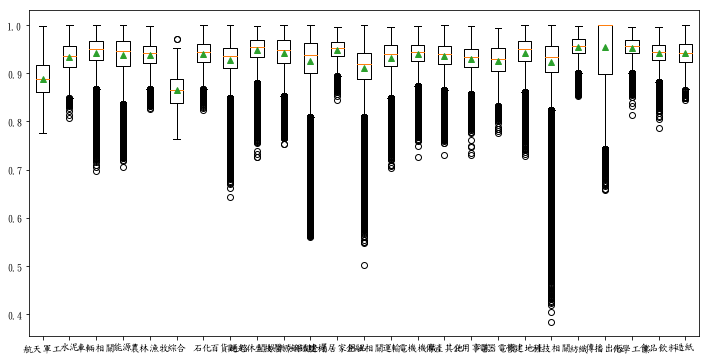

In [143]:
fig=plt.figure(figsize=(12,6))
# plt.xticks([2,3,4])
plt.boxplot(serieslist,showmeans=True,vert=True,labels=labels)

[Text(0,0,'航天軍工'),
 Text(0,0,'水泥'),
 Text(0,0,'車輛相關'),
 Text(0,0,'能源'),
 Text(0,0,'農林漁牧'),
 Text(0,0,'綜合'),
 Text(0,0,'石化'),
 Text(0,0,'百貨通路'),
 Text(0,0,'觀光休閒娛樂'),
 Text(0,0,'生技醫療保健'),
 Text(0,0,'鋼鐵金屬'),
 Text(0,0,'建材居家用品')]

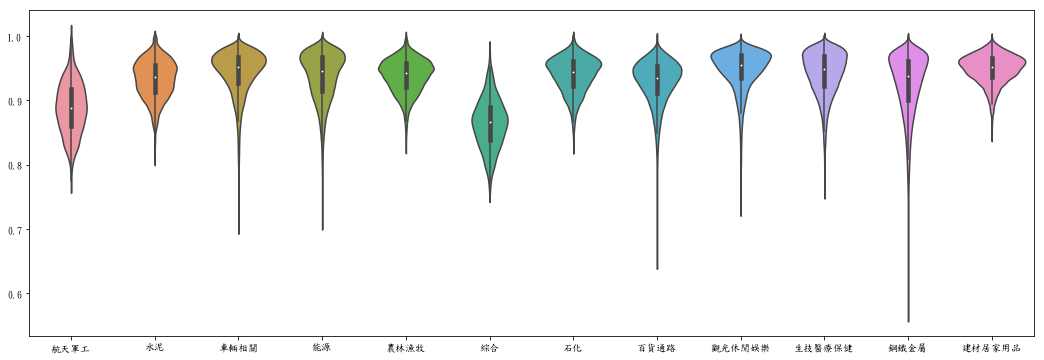

In [155]:
fig=plt.figure(figsize=(18,6))
ax=sns.violinplot(data=serieslist[:12],orient="v")
ax.set_xticklabels(labels[:12])

[Text(0,0,'金融相關'),
 Text(0,0,'運輸'),
 Text(0,0,'電機機械'),
 Text(0,0,'傳產其他'),
 Text(0,0,'公用事業'),
 Text(0,0,'電器電纜'),
 Text(0,0,'營建地產'),
 Text(0,0,'科技相關'),
 Text(0,0,'紡織'),
 Text(0,0,'傳播出版'),
 Text(0,0,'化學工業'),
 Text(0,0,'食品飲料'),
 Text(0,0,'造紙')]

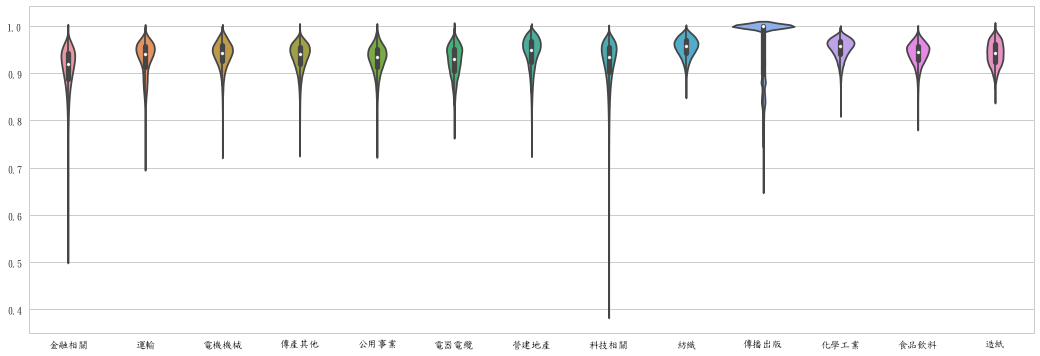

In [164]:
fig=plt.figure(figsize=(18,6))
ax=sns.violinplot(data=serieslist[12:],orient="v")
ax.set_xticklabels(labels[12:])

[Text(0,0,'科技相關')]

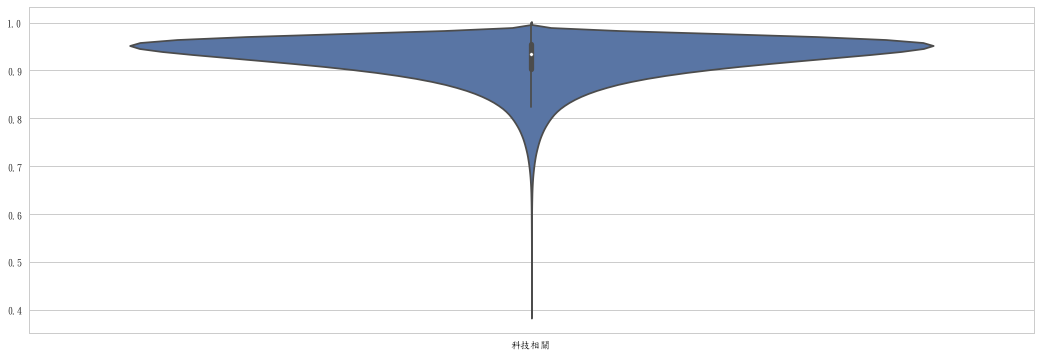

In [174]:
index=labels.index("科技相關")
fig=plt.figure(figsize=(18,6))
ax=sns.violinplot(data=serieslist[index:index+1],orient="v")
ax.set_xticklabels(labels[index:index+1])

#### similarity disrtrbution on testset

In [176]:
li=[]
model=encoder_in_AE
dict_collect_industry=test_dict_collect_industry
bow=Data
for k in tqdm_notebook(dict_collect_industry):
    array1=bow[dict_collect_industry[k]]
    if len(array1)!=0:
        array1=model.predict(array1)
        for j in dict_collect_industry:
                array2=bow[dict_collect_industry[j]]
                if len(array2)!=0:
                    array2=model.predict(array2)
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

航天軍工 航天軍工 0.83025926
航天軍工 水泥 0.6292446
航天軍工 車輛相關 0.74000436
航天軍工 能源 0.704562
航天軍工 農林漁牧 0.70680696
航天軍工 綜合 0.67934597
航天軍工 石化 0.65057486
航天軍工 百貨通路 0.7388498
航天軍工 觀光休閒娛樂 0.6750712
航天軍工 生技醫療保健 0.68983316
航天軍工 鋼鐵金屬 0.73455745
航天軍工 建材居家用品 0.689534
航天軍工 金融相關 0.7205657
航天軍工 運輸 0.6920882
航天軍工 電機機械 0.7858746
航天軍工 傳產其他 0.72916603
航天軍工 控股 0.7596078
航天軍工 公用事業 0.7324036
航天軍工 電器電纜 0.6955807
航天軍工 營建地產 0.64439
航天軍工 科技相關 0.7777478
航天軍工 紡織 0.6601824
航天軍工 傳播出版 0.6644652
航天軍工 化學工業 0.6944977
航天軍工 食品飲料 0.6725905
航天軍工 造紙 0.60627323
水泥 航天軍工 0.6292446
水泥 水泥 0.89448917
水泥 車輛相關 0.6783519
水泥 能源 0.62616885
水泥 農林漁牧 0.6170161
水泥 綜合 0.61142385
水泥 石化 0.67990375
水泥 百貨通路 0.623939
水泥 觀光休閒娛樂 0.61961514
水泥 生技醫療保健 0.60225105
水泥 鋼鐵金屬 0.6861781
水泥 建材居家用品 0.72785497
水泥 金融相關 0.64840174
水泥 運輸 0.65928715
水泥 電機機械 0.6349237
水泥 傳產其他 0.64663815
水泥 控股 0.6039644
水泥 公用事業 0.6356808
水泥 電器電纜 0.6656792
水泥 營建地產 0.7177449
水泥 科技相關 0.6295843
水泥 紡織 0.64856386
水泥 傳播出版 0.5549325
水泥 化學工業 0.7151134
水泥 食品飲料 0.67334485
水泥 造紙 0.6561115
車輛相關 航天軍工 0.7400

傳產其他 造紙 0.6331245
控股 航天軍工 0.7596078
控股 水泥 0.6039644
控股 車輛相關 0.854694
控股 能源 0.58106196
控股 農林漁牧 0.6647135
控股 綜合 0.66542125
控股 石化 0.62042934
控股 百貨通路 0.69858927
控股 觀光休閒娛樂 0.6333694
控股 生技醫療保健 0.6571508
控股 鋼鐵金屬 0.7058928
控股 建材居家用品 0.7415269
控股 金融相關 0.7289225
控股 運輸 0.61359817
控股 電機機械 0.82556736
控股 傳產其他 0.7699036
控股 控股 1.0000001
控股 公用事業 0.6517924
控股 電器電纜 0.7576626
控股 營建地產 0.63208324
控股 科技相關 0.83391845
控股 紡織 0.65264857
控股 傳播出版 0.6218784
控股 化學工業 0.70096725
控股 食品飲料 0.63270557
控股 造紙 0.6410488
公用事業 航天軍工 0.7324036
公用事業 水泥 0.6356808
公用事業 車輛相關 0.64317507
公用事業 能源 0.7635945
公用事業 農林漁牧 0.75640726
公用事業 綜合 0.71025485
公用事業 石化 0.6592851
公用事業 百貨通路 0.74812
公用事業 觀光休閒娛樂 0.6306645
公用事業 生技醫療保健 0.6478452
公用事業 鋼鐵金屬 0.7512078
公用事業 建材居家用品 0.6268617
公用事業 金融相關 0.7466832
公用事業 運輸 0.661187
公用事業 電機機械 0.68862045
公用事業 傳產其他 0.73293114
公用事業 控股 0.6517924
公用事業 公用事業 0.8329356
公用事業 電器電纜 0.647278
公用事業 營建地產 0.684609
公用事業 科技相關 0.69224423
公用事業 紡織 0.62557846
公用事業 傳播出版 0.642225
公用事業 化學工業 0.6574449
公用事業 食品飲料 0.71556365
公用事業 造紙 0.6159749
電器

In [284]:
serieslist=[]
labels=[]

for k in tqdm_notebook(list(test_dict_collect_industry.keys())):
    index=test_dict_collect_industry[k]
    test_x=Data[index]
    em_test_x=model.predict(test_x)
    simi=cosine_similarity(em_test_x)
    series=simi[np.tri(simi.shape[0],simi.shape[1],k=-1)==1]
#     series=simi
    serieslist.append(series)
    labels.append(k)


[Text(0,0,'航天軍工'),
 Text(0,0,'水泥'),
 Text(0,0,'車輛相關'),
 Text(0,0,'能源'),
 Text(0,0,'農林漁牧'),
 Text(0,0,'綜合'),
 Text(0,0,'石化'),
 Text(0,0,'百貨通路'),
 Text(0,0,'觀光休閒娛樂'),
 Text(0,0,'生技醫療保健'),
 Text(0,0,'鋼鐵金屬'),
 Text(0,0,'建材居家用品')]

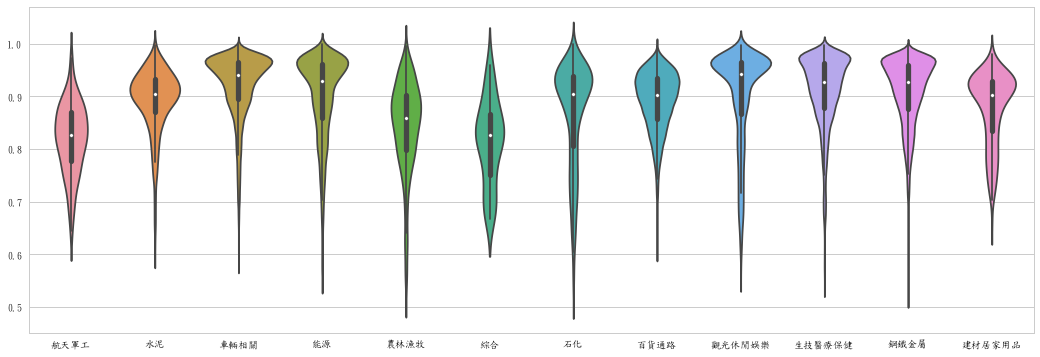

In [178]:
fig=plt.figure(figsize=(18,6))
ax=sns.violinplot(data=serieslist[:12],orient="v")
ax.set_xticklabels(labels[:12])

[Text(0,0,'金融相關'),
 Text(0,0,'運輸'),
 Text(0,0,'電機機械'),
 Text(0,0,'傳產其他'),
 Text(0,0,'控股'),
 Text(0,0,'公用事業'),
 Text(0,0,'電器電纜'),
 Text(0,0,'營建地產'),
 Text(0,0,'科技相關'),
 Text(0,0,'紡織'),
 Text(0,0,'傳播出版'),
 Text(0,0,'化學工業'),
 Text(0,0,'食品飲料'),
 Text(0,0,'造紙')]

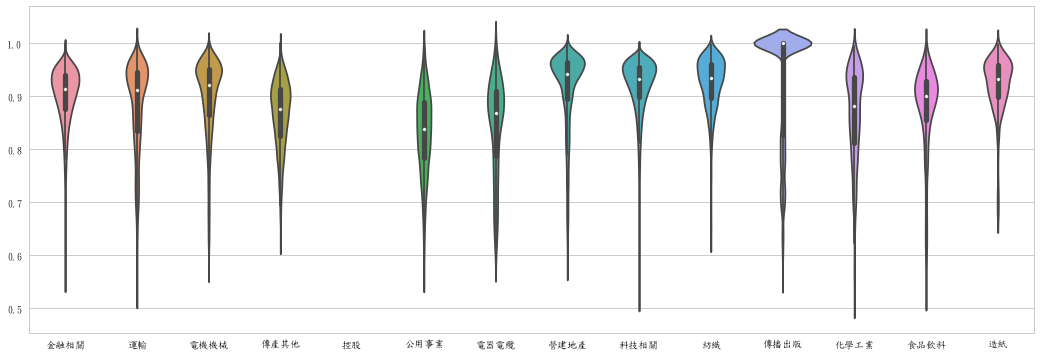

In [179]:
fig=plt.figure(figsize=(18,6))
ax=sns.violinplot(data=serieslist[12:],orient="v")
ax.set_xticklabels(labels[12:])

#### dissimilarity distribution

In [188]:
index1=test_dict_collect_industry["化學工業"]
index2=test_dict_collect_industry["公用事業"]
x1=Data[index1]
x2=Data[index2]
em_x1=model.predict(x1)
em_x2=model.predict(x2)
simi=cosine_similarity(em_x1,em_x2)
simi=simi.reshape(1,-1)

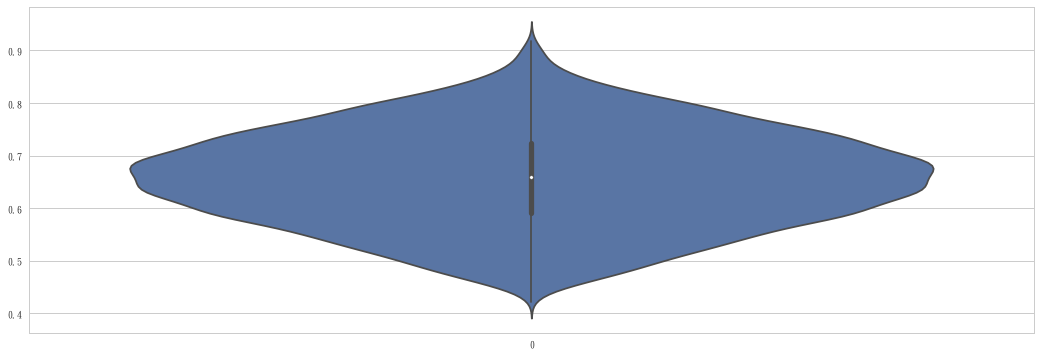

In [189]:
fig=plt.figure(figsize=(18,6))
ax=sns.violinplot(data=simi,orient="v")

In [283]:
dissimilarity=[]
industry=[]
dict_collect_industry=test_dict_collect_industry
for k in tqdm_notebook(list(dict_collect_industry.keys())):
    index1=dict_collect_industry[k]
    x1=Data[index1]
    em_x1=model.predict(x1)
    simitotla=[]
    for j in list(dict_collect_industry.keys()):
        if k!=j:
            index2=dict_collect_industry[j]
            x2=Data[index2]
            em_x2=model.predict(x2)
            simi=cosine_similarity(em_x1,em_x2)
            simi=list(simi.flatten())
            simitotla+=simi
    dissimilarity.append(simitotla)  
    industry.append(k)

[Text(0,0,'航天軍工'),
 Text(0,0,'水泥'),
 Text(0,0,'車輛相關'),
 Text(0,0,'能源'),
 Text(0,0,'農林漁牧'),
 Text(0,0,'綜合'),
 Text(0,0,'石化'),
 Text(0,0,'百貨通路'),
 Text(0,0,'觀光休閒娛樂'),
 Text(0,0,'生技醫療保健'),
 Text(0,0,'鋼鐵金屬'),
 Text(0,0,'建材居家用品')]

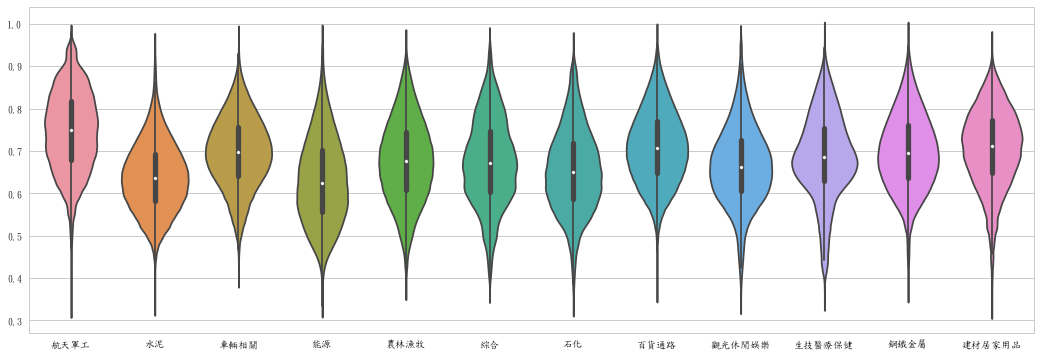

In [219]:
fig=plt.figure(figsize=(18,6))
ax=sns.violinplot(data=dissimilarity[:12],orient="v",)
ax.set_xticklabels(industry[:12])

[Text(0,0,'金融相關'),
 Text(0,0,'運輸'),
 Text(0,0,'電機機械'),
 Text(0,0,'傳產其他'),
 Text(0,0,'控股'),
 Text(0,0,'公用事業'),
 Text(0,0,'電器電纜'),
 Text(0,0,'營建地產'),
 Text(0,0,'科技相關'),
 Text(0,0,'紡織'),
 Text(0,0,'傳播出版'),
 Text(0,0,'化學工業'),
 Text(0,0,'食品飲料'),
 Text(0,0,'造紙')]

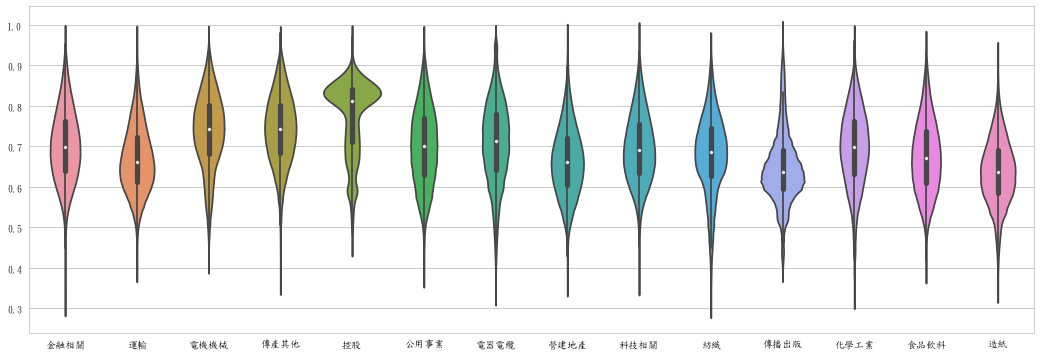

In [220]:
fig=plt.figure(figsize=(18,6))
ax=sns.violinplot(data=dissimilarity[12:],orient="v")
ax.set_xticklabels(industry[12:])

## R,UR,(U-UR)/2,Simi-Quortail,Dissimi-Quortail on testset

In [221]:
li=[]
model=encoder_in_AE
dict_collect_industry=test_dict_collect_industry
bow=Data
for k in tqdm_notebook(dict_collect_industry):
    array1=bow[dict_collect_industry[k]]
    if len(array1)!=0:
        array1=model.predict(array1)
        for j in dict_collect_industry:
                array2=bow[dict_collect_industry[j]]
                if len(array2)!=0:
                    array2=model.predict(array2)
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

航天軍工 航天軍工 0.83025926
航天軍工 水泥 0.6292446
航天軍工 車輛相關 0.74000436
航天軍工 能源 0.704562
航天軍工 農林漁牧 0.70680696
航天軍工 綜合 0.67934597
航天軍工 石化 0.65057486
航天軍工 百貨通路 0.7388498
航天軍工 觀光休閒娛樂 0.6750712
航天軍工 生技醫療保健 0.68983316
航天軍工 鋼鐵金屬 0.73455745
航天軍工 建材居家用品 0.689534
航天軍工 金融相關 0.7205657
航天軍工 運輸 0.6920882
航天軍工 電機機械 0.7858746
航天軍工 傳產其他 0.72916603
航天軍工 控股 0.7596078
航天軍工 公用事業 0.7324036
航天軍工 電器電纜 0.6955807
航天軍工 營建地產 0.64439
航天軍工 科技相關 0.7777478
航天軍工 紡織 0.6601824
航天軍工 傳播出版 0.6644652
航天軍工 化學工業 0.6944977
航天軍工 食品飲料 0.6725905
航天軍工 造紙 0.60627323
水泥 航天軍工 0.6292446
水泥 水泥 0.89448917
水泥 車輛相關 0.6783519
水泥 能源 0.62616885
水泥 農林漁牧 0.6170161
水泥 綜合 0.61142385
水泥 石化 0.67990375
水泥 百貨通路 0.623939
水泥 觀光休閒娛樂 0.61961514
水泥 生技醫療保健 0.60225105
水泥 鋼鐵金屬 0.6861781
水泥 建材居家用品 0.72785497
水泥 金融相關 0.64840174
水泥 運輸 0.65928715
水泥 電機機械 0.6349237
水泥 傳產其他 0.64663815
水泥 控股 0.6039644
水泥 公用事業 0.6356808
水泥 電器電纜 0.6656792
水泥 營建地產 0.7177449
水泥 科技相關 0.6295843
水泥 紡織 0.64856386
水泥 傳播出版 0.5549325
水泥 化學工業 0.7151134
水泥 食品飲料 0.67334485
水泥 造紙 0.6561115
車輛相關 航天軍工 0.7400

傳產其他 造紙 0.6331245
控股 航天軍工 0.7596078
控股 水泥 0.6039644
控股 車輛相關 0.854694
控股 能源 0.58106196
控股 農林漁牧 0.6647135
控股 綜合 0.66542125
控股 石化 0.62042934
控股 百貨通路 0.69858927
控股 觀光休閒娛樂 0.6333694
控股 生技醫療保健 0.6571508
控股 鋼鐵金屬 0.7058928
控股 建材居家用品 0.7415269
控股 金融相關 0.7289225
控股 運輸 0.61359817
控股 電機機械 0.82556736
控股 傳產其他 0.7699036
控股 控股 1.0000001
控股 公用事業 0.6517924
控股 電器電纜 0.7576626
控股 營建地產 0.63208324
控股 科技相關 0.83391845
控股 紡織 0.65264857
控股 傳播出版 0.6218784
控股 化學工業 0.70096725
控股 食品飲料 0.63270557
控股 造紙 0.6410488
公用事業 航天軍工 0.7324036
公用事業 水泥 0.6356808
公用事業 車輛相關 0.64317507
公用事業 能源 0.7635945
公用事業 農林漁牧 0.75640726
公用事業 綜合 0.71025485
公用事業 石化 0.6592851
公用事業 百貨通路 0.74812
公用事業 觀光休閒娛樂 0.6306645
公用事業 生技醫療保健 0.6478452
公用事業 鋼鐵金屬 0.7512078
公用事業 建材居家用品 0.6268617
公用事業 金融相關 0.7466832
公用事業 運輸 0.661187
公用事業 電機機械 0.68862045
公用事業 傳產其他 0.73293114
公用事業 控股 0.6517924
公用事業 公用事業 0.8329356
公用事業 電器電纜 0.647278
公用事業 營建地產 0.684609
公用事業 科技相關 0.69224423
公用事業 紡織 0.62557846
公用事業 傳播出版 0.642225
公用事業 化學工業 0.6574449
公用事業 食品飲料 0.71556365
公用事業 造紙 0.6159749
電器

In [222]:
df_trainAE=pd.DataFrame(li)
df_trainAE=df_trainAE.pivot(index=0,columns=1,values=2)

In [365]:
#AE
li=[]
for i,S in df_trainAE[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
df=pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)
# df=df.drop("控股")
df=df.set_index("industry")
df=df.drop("控股")
df

,R,UR,(R-UR)/2
industry,,,
傳播出版,0.925514,0.610085,0.157715
造紙,0.921840,0.620845,0.150498
生技醫療保健,0.910350,0.641394,0.134478
能源,0.899817,0.634337,0.132740
紡織,0.923452,0.658917,0.132267
營建地產,0.914035,0.653182,0.130427
觀光休閒娛樂,0.900535,0.649424,0.125555
車輛相關,0.920575,0.670819,0.124878
水泥,0.894489,0.647677,0.123406


#### add IQR,STD,Q3,Q1

In [326]:
SimilarityDistribution={k:np.asarray(d) for k,d in zip(labels,serieslist)}
DissimilarityDistribution={k:np.asarray(d) for k,d in zip(industry,dissimilarity)}
SimilarityDistribution.pop("控股","nothiskey")
DissimilarityDistribution.pop("控股","nothiskey")

array([0.7373148, 0.7428363, 0.8010107, ..., 0.7647563, 0.5822522,
       0.6310458], dtype=float32)

In [371]:
simiquartile={k : np.round(np.percentile(SimilarityDistribution[k],[75,50,25]),3) for k in SimilarityDistribution }
dissimiquartile={k : np.round(np.percentile(DissimilarityDistribution[k],[75,50,25]),3) for k in DissimilarityDistribution }

In [364]:
SimiQ=pd.DataFrame(simiquartile,index=["Q3","Q2","Q1"]).T
SimiQ

,Q3,Q2,Q1
傳播出版,1.000,1.000,0.826
傳產其他,0.913,0.876,0.826
公用事業,0.888,0.839,0.783
化學工業,0.937,0.882,0.811
建材居家用品,0.930,0.903,0.834
水泥,0.933,0.905,0.870
營建地產,0.964,0.942,0.894
生技醫療保健,0.964,0.928,0.878
百貨通路,0.934,0.902,0.858
石化,0.940,0.904,0.805


In [370]:
df["Simi-Q3"]=SimiQ["Q3"]
df["Simi-Q2"]=SimiQ["Q2"]
df["Simi-Q1"]=SimiQ["Q1"]
df["Simi-IQR"]=df["Simi-Q3"]-df["Simi-Q1"]
df

,R,UR,(R-UR)/2,Simi-Q3,Simi-Q2,Simi-Q1,Simi-IQR
industry,,,,,,,
傳播出版,0.925514,0.610085,0.157715,1.000,1.000,0.826,0.174
造紙,0.921840,0.620845,0.150498,0.958,0.932,0.898,0.060
生技醫療保健,0.910350,0.641394,0.134478,0.964,0.928,0.878,0.086
能源,0.899817,0.634337,0.132740,0.962,0.929,0.858,0.104
紡織,0.923452,0.658917,0.132267,0.961,0.934,0.896,0.065
營建地產,0.914035,0.653182,0.130427,0.964,0.942,0.894,0.070
觀光休閒娛樂,0.900535,0.649424,0.125555,0.966,0.942,0.866,0.100
車輛相關,0.920575,0.670819,0.124878,0.965,0.941,0.895,0.070
水泥,0.894489,0.647677,0.123406,0.933,0.905,0.870,0.063


In [372]:
DissimiQ=pd.DataFrame(dissimiquartile,index=["Q3","Q2","Q1"]).T
DissimiQ

,Q3,Q2,Q1
傳播出版,0.690,0.637,0.595
傳產其他,0.803,0.744,0.684
公用事業,0.769,0.700,0.630
化學工業,0.763,0.698,0.631
建材居家用品,0.773,0.712,0.647
水泥,0.694,0.636,0.581
營建地產,0.720,0.661,0.604
生技醫療保健,0.755,0.687,0.630
百貨通路,0.770,0.707,0.647
石化,0.720,0.650,0.586


In [373]:
df["Dissimi-Q3"]=DissimiQ["Q3"]
df["Dissimi-Q2"]=DissimiQ["Q2"]
df["Dissimi-Q1"]=DissimiQ["Q1"]
df["Dissimi-IQR"]=df["Dissimi-Q3"]-df["Dissimi-Q1"]
df[]

,R,UR,(R-UR)/2,Simi-Q3,Simi-Q2,Simi-Q1,Simi-IQR,Dissimi-Q3,Dissimi-Q2,Dissimi-Q1,Dissimi-IQR
industry,,,,,,,,,,,
傳播出版,0.925514,0.610085,0.157715,1.000,1.000,0.826,0.174,0.690,0.637,0.595,0.095
造紙,0.921840,0.620845,0.150498,0.958,0.932,0.898,0.060,0.691,0.636,0.584,0.107
生技醫療保健,0.910350,0.641394,0.134478,0.964,0.928,0.878,0.086,0.755,0.687,0.630,0.125
能源,0.899817,0.634337,0.132740,0.962,0.929,0.858,0.104,0.702,0.625,0.555,0.147
紡織,0.923452,0.658917,0.132267,0.961,0.934,0.896,0.065,0.745,0.686,0.627,0.118
營建地產,0.914035,0.653182,0.130427,0.964,0.942,0.894,0.070,0.720,0.661,0.604,0.116
觀光休閒娛樂,0.900535,0.649424,0.125555,0.966,0.942,0.866,0.100,0.725,0.663,0.605,0.120
車輛相關,0.920575,0.670819,0.124878,0.965,0.941,0.895,0.070,0.756,0.698,0.641,0.115
水泥,0.894489,0.647677,0.123406,0.933,0.905,0.870,0.063,0.694,0.636,0.581,0.113


In [386]:
df.describe()[["R","UR","(R-UR)/2","Simi-Q1","Dissimi-Q3"]].loc[["mean"]].T

,mean
R,0.886348
UR,0.667695
(R-UR)/2,0.109326
Simi-Q1,0.844680
Dissimi-Q3,0.748320
